In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
import h5py

%matplotlib inline

ModuleNotFoundError: No module named 'h5py'

In [2]:
# map_feature contains degree which depicts how many number of features do you want to create from your two 
# existing features.

In [3]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)

def sig(z):
    return 1/(1+np.exp(-z))

def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code
     
    plot_data(X[:, 0:2], y)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        plt.plot(plot_x, plot_y, c="b")
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0
        plt.contour(u,v,z, levels = [0.5], colors="g")

def map_feature(X1, X2):
    """
    Feature mapping function to polynomial features    
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    out = []
    degree = 1
    for i in range(1, degree+1):
        for j in range(i + 1):
            # print("a^",(i-j),"b^",j)
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)


Recall that for logistic regression, the model is represented as

<!-- $$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the `sigmoid function`. The sigmoid function is defined as: -->

$$ f_{\mathbf{w},b}(x) = g(z) = \frac{1}{1+e^{-z}} $$



The cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset

* $$ z = \mathbf{w}\cdot \mathbf{x} + b $$

* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
 


In [4]:
# def sigmoid(z):
#     g = 1/(1+np.exp(-z))
#     return g

In [5]:
# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """
    m, n = X.shape
    z = np.dot(X, w) + b
    f_wb = sig(z)
    cost = np.mean(-y * np.log(f_wb) - (1 - y) * np.log(1 - f_wb))

    return cost

In [6]:
# m, n = X_train.shape
# initial_w = np.zeros(n)
# initial_b = 0.
# cost = compute_cost(X_train, y_train, initial_w, initial_b)
# print('Cost at initial w (zeros): {:.3f}'.format(cost))


Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously




`compute_gradient` function to compute $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$ from equations (2) and (3) below.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the actual label


In [7]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """

    # m, n = X.shape
    # dj_dw = np.zeros(w.shape)
    # dj_db = 0.

    # ### START CODE HERE ### 
    # for i in range(m):
    #     f_wb_i = sigmoid(np.dot(X[i],w) + b)          
    #     err_i  = f_wb_i  - y[i]                       
    #     for j in range(n):
    #         dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
    #     dj_db = dj_db + err_i
    # dj_dw = dj_dw/m                                   
    # dj_db = dj_db/m

    
    m, n = X.shape
    f_wb = sig(np.dot(X, w) + b)
    err = f_wb - y
    dj_dw = np.dot(X.T, err) / m
    dj_db = np.mean(err)
    return dj_db, dj_dw                           

In [41]:
# # Compute and display gradient with w initialized to zeroes

# m, n = X_train.shape
# initial_w = np.zeros(n)
# initial_b = 0.

# dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
# print(f'dj_db at initial w (zeros):{dj_db}' )
# print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

In [8]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

### ex2data Dataset

In [10]:
import os
os.getcwd()

path = '../../../Data/Logistic_Regression/ex2data1.txt'
X_train, y_train = load_data(path)


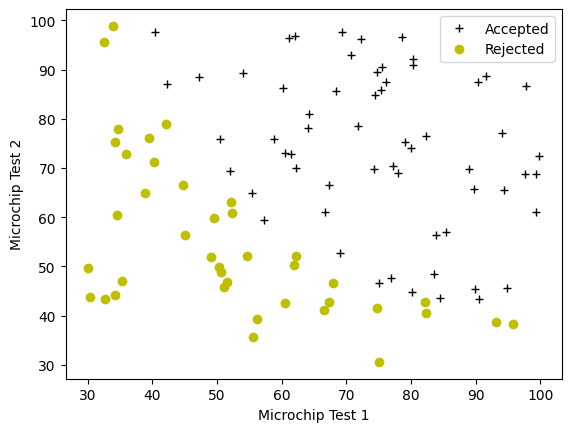

In [11]:
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

In [79]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(X_train.shape[1]).reshape(-1,1) - 0.5)
# initial_w = np.zeros(X_train.shape[1])
initial_b = -8


# Some gradient descent settings
iterations = 100
alpha = 0.00005

print(X_train.shape)
print(y_train.shape)
print(initial_w.shape)

(100, 2)
(100,)
(2, 1)


In [80]:
w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     4.48   
Iteration   10: Cost     1.94   
Iteration   20: Cost     0.60   
Iteration   30: Cost     0.29   
Iteration   40: Cost     0.19   
Iteration   50: Cost     0.14   
Iteration   60: Cost     0.11   
Iteration   70: Cost     0.09   
Iteration   80: Cost     0.07   
Iteration   90: Cost     0.06   
Iteration   99: Cost     0.06   


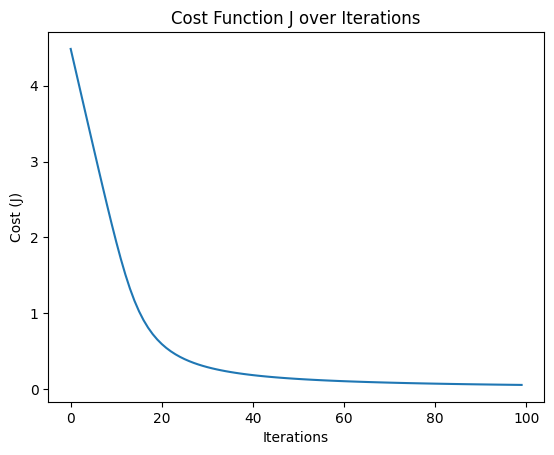

In [68]:
# Assume that J_history is a list or array containing the cost at each iteration
# Plot the cost function over iterations
plt.plot(J_history)

# Add labels and title to the plot
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('Cost Function J over Iterations')

# Show the plot
plt.show()


In [17]:
# plot_decision_boundary(w, b, X_train, y_train)

### Catvsnoncat Dataset

In [9]:
path_train = '../../../Data/Logistic_Regression/catvnoncat/train_catvnoncat.h5'
path_test = '../../../Data/Logistic_Regression/catvnoncat/test_catvnoncat.h5'

def load_dataset():
    train_dataset = h5py.File(path_train, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(path_test, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [94]:
# load dataset
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
print(train_set_x_orig.shape, '\n')

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)

train_set_y = train_set_y.T.squeeze()

train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.


np.random.seed(1)
initial_w = 0.01 * (np.random.rand(train_set_x.shape[1]).reshape(-1,1) - 0.5)
# initial_w = np.zeros(train_set_x.shape[1])
initial_b = -8


# # Some gradient descent settings
iterations = 200
alpha = 0.0001

print(train_set_x.shape)
print(train_set_y.shape)
print(initial_w.shape)

(209, 64, 64, 3) 

(209, 12288)
(209,)
(12288, 1)


In [95]:
w,b, J_history,_ = gradient_descent(train_set_x ,train_set_y, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     2.70   
Iteration   20: Cost     1.32   
Iteration   40: Cost     0.52   
Iteration   60: Cost     0.31   
Iteration   80: Cost     0.22   
Iteration  100: Cost     0.18   
Iteration  120: Cost     0.15   
Iteration  140: Cost     0.13   
Iteration  160: Cost     0.12   
Iteration  180: Cost     0.11   
Iteration  199: Cost     0.10   


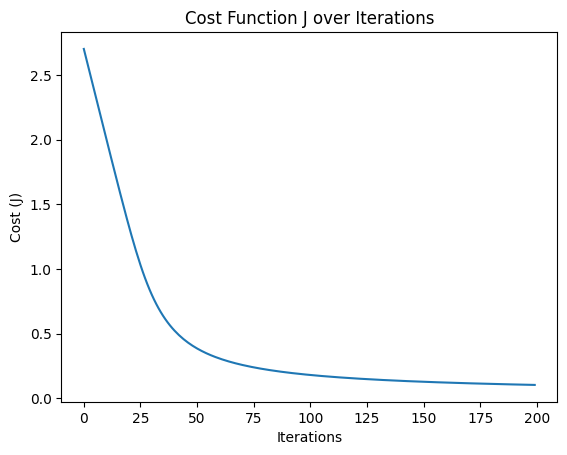

In [96]:
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('Cost Function J over Iterations')
plt.show()


In [93]:
w.shape

(12288, 209)

# Feature Mapping

In [21]:

print("Original shape of data:", X_train.shape)
X_mapped =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", X_mapped.shape)

Original shape of data: (100, 2)
Shape after feature mapping: (100, 5)


In [29]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
# intial_w = np.zeros(X_mapped.shape[1])
initial_b = -8


# Some gradient descent settings
iterations = 90000
alpha = 0.0000001

w,b, J_history,_ = gradient_descent(X_mapped ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

C:\Users\Hamza Jadoon\AppData\Local\Temp\ipykernel_10480\3593790199.py:2: RuntimeWarning: overflow encountered in exp
  g = 1/(1+np.exp(-z))
C:\Users\Hamza Jadoon\AppData\Local\Temp\ipykernel_10480\3898030761.py:18: RuntimeWarning: divide by zero encountered in log
  cost = np.mean(-y * np.log(f_wb) - (1 - y) * np.log(1 - f_wb))
C:\Users\Hamza Jadoon\AppData\Local\Temp\ipykernel_10480\3898030761.py:18: RuntimeWarning: invalid value encountered in multiply
  cost = np.mean(-y * np.log(f_wb) - (1 - y) * np.log(1 - f_wb))


Iteration    0: Cost      nan   
Iteration 9000: Cost      nan   
Iteration 18000: Cost      nan   
Iteration 27000: Cost     0.32   
Iteration 36000: Cost     0.28   
Iteration 45000: Cost     0.28   
Iteration 54000: Cost     0.28   
Iteration 63000: Cost     0.27   
Iteration 72000: Cost     0.27   
Iteration 81000: Cost     0.27   
Iteration 89999: Cost     0.27   


C:\Users\Hamza Jadoon\AppData\Local\Temp\ipykernel_10480\912397848.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)


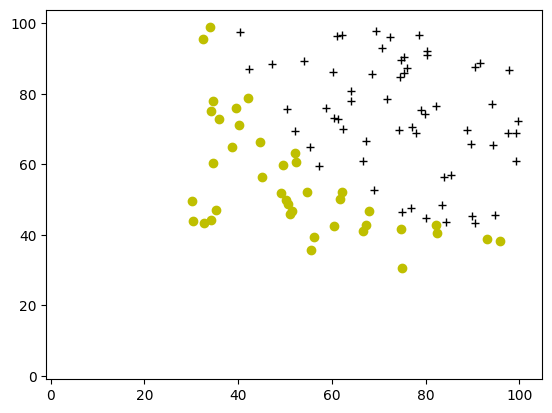

In [30]:
plot_decision_boundary(w, b, X_mapped, y_train)

# Prediction

In [101]:
# def predict(X, w, b):

#     f = np.dot(X, w) + b
#     predictions = sig(f)
#     indices = np.where(predictions > 0.5)

#     predicted_labels = np.zeros(predictions.shape)
#     predicted_labels[indices] = 1
#     accuracy = np.mean(predicted_labels == y_train)
    
#     return accuracy

# accuracy = predict(X_train, w, b)
# accuracy



In [100]:
def predict(w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = sig(np.dot(w.T,X) + b)           # Dimentions = (1, m)
    Y_prediction = (A >= 0.5) * 1.0
    
    return Y_prediction

